<a href="https://colab.research.google.com/github/Aline-YG/estagio/blob/main/estagio.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Target - Estágio - São Paulo

In [1]:
# Importar as bibliotecas
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
import sqlite3

1) Observe o trecho de código abaixo: int INDICE = 13, SOMA = 0, K = 0;
Enquanto K < INDICE faça { K = K + 1; SOMA = SOMA + K; }
Imprimir(SOMA);
Ao final do processamento, qual será o valor da variável SOMA?


In [22]:
indice = 13
soma = 0
k = 0

while (k < indice):
  k += 1
  soma = soma + k

print(f'Ao final do processamento, o valor da variável SOMA terá o valor: {soma}.')

Ao final do processamento, o valor da variável SOMA terá o valor: 91.


2) Dado a sequência de Fibonacci, onde se inicia por 0 e 1 e o próximo valor sempre será a soma dos 2 valores anteriores (exemplo: 0, 1, 1, 2, 3, 5, 8, 13, 21, 34...), escreva um programa na linguagem que desejar onde, informado um número, ele calcule a sequência de Fibonacci e retorne uma mensagem avisando se o número informado pertence ou não a sequência.

IMPORTANTE: Esse número pode ser informado através de qualquer entrada de sua preferência ou pode ser previamente definido no código;

In [29]:
# Função para calcular a sequência de Fibonacci até o número inserido
def pertence_fibonacci(numero):
  a, b = 0, 1
  while b < numero:
    a, b = b, a + b

# Verificar se o número informado é igual a b (um número da sequência de Fibonacci)
  if b == numero or numero == 0:
    return f"O número {numero} pertence a sequência de Fibonacci."
  else:
    return f"O número {numero} não pertence a sequência de Fibonacci."

# Solicitar ao usuário a inserção de um número
numero_informado = int(input("Informe um número: "))

# Chamar função e exibir o resultado
print(pertence_fibonacci(numero_informado))

Informe um número: 34
O número 34 pertence a sequência de Fibonacci.


3) Dado um vetor que guarda o valor de faturamento diário de uma distribuidora, faça um programa, na linguagem que desejar, que calcule e retorne:
• O menor valor de faturamento ocorrido em um dia do mês;
• O maior valor de faturamento ocorrido em um dia do mês;
• Número de dias no mês em que o valor de faturamento diário foi superior à média mensal.

IMPORTANTE:
a) Usar o json ou xml disponível como fonte dos dados do faturamento mensal;
b) Podem existir dias sem faturamento, como nos finais de semana e feriados. Estes dias devem ser ignorados no cálculo da média;

In [6]:
# Carregar o arquivo JSON
caminho_json = 'dados.json'
df = pd.read_json(caminho_json)

In [31]:
df.head()

,dia,valor
0,1,22174.1664
1,2,24537.6698
2,3,26139.6134
3,4,0.0000
4,5,0.0000


In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30 entries, 0 to 29
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   dia     30 non-null     int64  
 1   valor   30 non-null     float64
dtypes: float64(1), int64(1)
memory usage: 608.0 bytes


In [8]:
df.describe()

,dia,valor
count,30.000000,30.000000
mean,15.500000,14605.759117
std,8.803408,16136.538644
min,1.000000,0.000000
25%,8.250000,0.000000
50%,15.500000,9803.041100
75%,22.750000,25395.791300
max,30.000000,48924.244800


In [32]:
df_dias_com_faturamento = df[df['valor']>0]
df_dias_com_faturamento

,dia,valor
0,1,22174.1664
1,2,24537.6698
2,3,26139.6134
5,6,26742.6612
7,8,42889.2258
8,9,46251.1740
9,10,11191.4722
12,13,3847.4823
13,14,373.7838
14,15,2659.7563


In [40]:
# Encontrar o valor do faturamento máximo, mínimo e a média sem os dias sem vendas
faturamento_min = df_dias_com_faturamento['valor'].min()
faturamento_max = df_dias_com_faturamento['valor'].max()
faturamento_media = df_dias_com_faturamento['valor'].mean()

# Número de dias com faturamnto acíma da média mensal
dias_faturamento_acima_media = df_dias_com_faturamento[df_dias_com_faturamento['valor']> faturamento_media].shape[0]

# Exibir resultado
print(f'Menor valor de faturamento: {faturamento_min}')
print(f'Maior valor de faturamento: {faturamento_max}')
print(f'Faturamento médio mensal: {faturamento_media}')
print(f'Número de dias con fauramento superior ao faturamento médio mensal: {dias_faturamento_acima_media}')

373.7838
48924.2448
20865.370166666664
10
Menor valor de faturamento: 373.7838
Maior valor de faturamento: 48924.2448
Faturamento médio mensal: 20865.370166666664
Número de dias con fauramento superior ao faturamento médio mensal: 10


4) Dado o valor de faturamento mensal de uma distribuidora, detalhado por estado:
• SP – R$67.836,43
• RJ – R$36.678,66
• MG – R$29.229,88
• ES – R$27.165,48
• Outros – R$19.849,53

Escreva um programa na linguagem que desejar onde calcule o percentual de representação que cada estado teve dentro do valor total mensal da distribuidora.

In [42]:
# Dados faturamento por estado
dados_distribuidora = {
    'Estado': ['SP', 'RJ', 'MG', 'ES', 'Outros'],
    'Faturamento': [67836.43, 36678.66, 29229.88, 27165.48, 19849.53]
}

# Criando o DataFrame
df_distribuidora = pd.DataFrame(dados)

# Calculando o faturamento total
faturamento_total = df_distribuidora['Faturamento'].sum()

# Calculando o percentual de faturamento por estado
df_distribuidora['Percentual'] = (df_distribuidora['Faturamento'] / faturamento_total) * 100

# Exibindo os dados com percentual
print(df_distribuidora)



   Estado  Faturamento  Percentual
0      SP     67836.43   37.528456
1      RJ     36678.66   20.291361
2      MG     29229.88   16.170548
3      ES     27165.48   15.028481
4  Outros     19849.53   10.981153


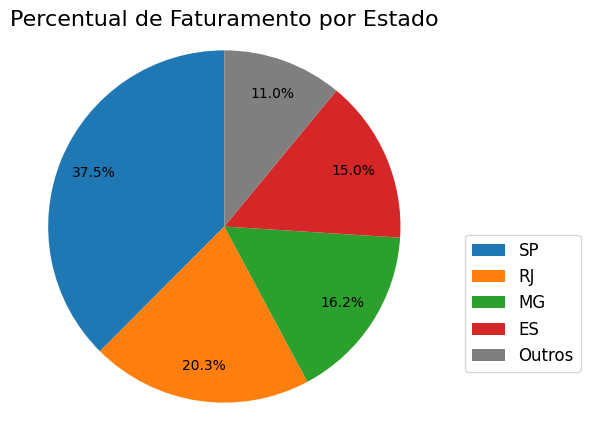

In [69]:
# Paleta de cores
cores_masculinas = ['#1f77b4', '#ff7f0e', '#2ca02c', '#d62728', '#7f7f7f']

plt.figure(figsize=(5, 5))
plt.pie(df_distribuidora['Faturamento'], labels=None, autopct='%1.1f%%', startangle=90,
        colors=cores_masculinas, pctdistance=0.8)

# Colocando os rótulos fora do gráfico
plt.legend(df_distribuidora['Estado'], loc='upper left', bbox_to_anchor=(1.1, 0.5), fontsize=12)

# Título do gráfico
plt.title('Percentual de Faturamento por Estado', fontsize=16)
plt.axis('equal')  # Para manter o gráfico circular
plt.show()


5) Escreva um programa que inverta os caracteres de um string.

IMPORTANTE:
a) Essa string pode ser informada através de qualquer entrada de sua preferência ou pode ser previamente definida no código;
b) Evite usar funções prontas, como, por exemplo, reverse;

In [55]:
# Função para inverter os caracteres de uma string
def inverter_string(string):
    string_invertida = ''

# Percorre a string inserida de trás para frente, adicionando cada caractere à string invertida
    for i in range(len(string) - 1, -1, -1):
        string_invertida += string[i]

    return string_invertida

# Solicitar a entrada do usuário
string_informada = input("Informe uma palavra ou frase: ")

# Chamar função e exibir o resultado
string_invertida = inverter_string(string_informada)
print(f"String invertida: {string_invertida}")

Informe uma string para inverter: Anderson Assao
String invertida: oassA nosrednA
